In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

train_data = pd.read_csv('Indian_houses/train.csv')
test_data = pd.read_csv('Indian_houses/test.csv')

In [2]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


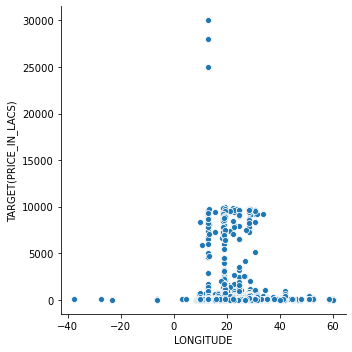

In [3]:
sns.relplot(data=train_data, x='LONGITUDE', y='TARGET(PRICE_IN_LACS)') 

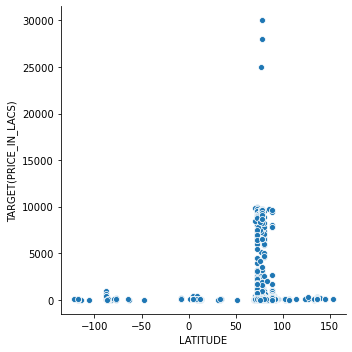

In [4]:
sns.relplot(data=train_data, x='LATITUDE', y='TARGET(PRICE_IN_LACS)') 

In [3]:
# test_data

In [5]:
train_data = train_data.drop(['ADDRESS', 'LONGITUDE', 'LATITUDE'], axis=1)
print(train_data)

      POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29446     Owner                   0     0        3       BHK  2500.000000   
29447     Owner                   0     0        2       BHK   769.230769   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE  TARGET(PRICE_IN_LACS)  
0                  1 

In [5]:
train_data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
print(train_data['UNDER_CONSTRUCTION'].value_counts())          # number of houses that are under construction

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64


In [7]:
print(train_data['READY_TO_MOVE'].value_counts())                # number of houses that are ready to move in

1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64


In [8]:
print(train_data['RESALE'].value_counts())  # number of houses that are ready to move in

1    27377
0     2074
Name: RESALE, dtype: int64


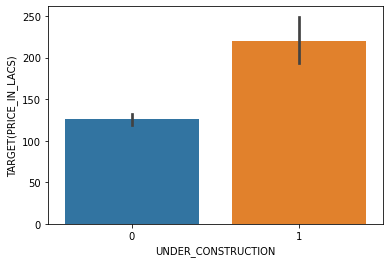

In [9]:
sns.barplot(data=train_data, x='UNDER_CONSTRUCTION', y='TARGET(PRICE_IN_LACS)') 

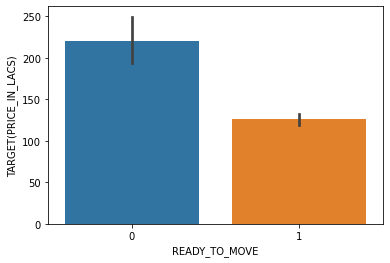

In [10]:
sns.barplot(data=train_data, x='READY_TO_MOVE', y='TARGET(PRICE_IN_LACS)') 

In [11]:
print(train_data.groupby('UNDER_CONSTRUCTION').agg({'TARGET(PRICE_IN_LACS)':'mean'}))

                    TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION                       
0                              125.863279
1                              220.633121


In [12]:
print(train_data['POSTED_BY'].value_counts())

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64


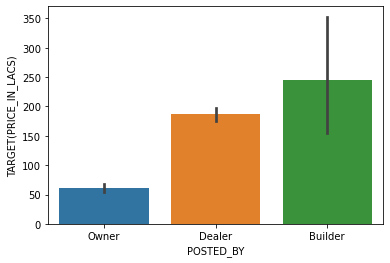

In [13]:
sns.barplot(data=train_data, x='POSTED_BY', y='TARGET(PRICE_IN_LACS)') 

In [14]:
print(train_data.groupby('POSTED_BY').agg({'TARGET(PRICE_IN_LACS)':'mean'}))

           TARGET(PRICE_IN_LACS)
POSTED_BY                       
Builder               245.705627
Dealer                186.774735
Owner                  60.674264


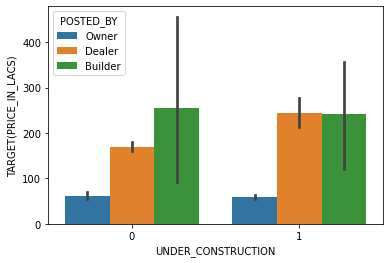

In [15]:
sns.barplot(data=train_data, x='UNDER_CONSTRUCTION', y='TARGET(PRICE_IN_LACS)', hue='POSTED_BY')

In [16]:
print(train_data['BHK_NO.'].value_counts())

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64


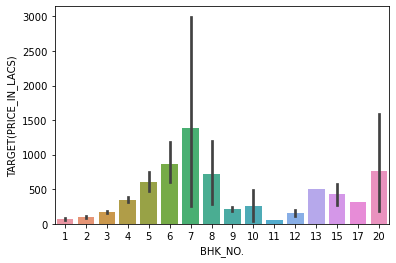

In [17]:
sns.barplot(data=train_data, x='BHK_NO.', y='TARGET(PRICE_IN_LACS)') 

In [18]:
print(train_data.groupby('BHK_NO.').agg({'TARGET(PRICE_IN_LACS)':'mean'}))

         TARGET(PRICE_IN_LACS)
BHK_NO.                       
1                    72.563433
2                    97.176584
3                   176.329423
4                   350.820255
5                   604.187895
6                   868.842308
7                  1387.590909
8                   727.000000
9                   213.333333
10                  263.962500
11                   55.000000
12                  163.333333
13                  500.000000
15                  427.500000
17                  320.000000
20                  768.800000


In [19]:
print(train_data['BHK_OR_RK'].value_counts())

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64


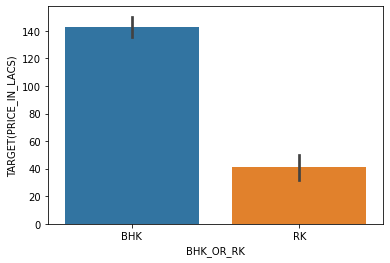

In [20]:
sns.barplot(data=train_data, x='BHK_OR_RK', y='TARGET(PRICE_IN_LACS)') 

In [21]:
print(train_data.groupby('BHK_OR_RK').agg({'TARGET(PRICE_IN_LACS)':'mean'}))

           TARGET(PRICE_IN_LACS)
BHK_OR_RK                       
BHK                   142.981821
RK                     41.037500


In [22]:
print(train_data['RERA'].value_counts())

0    20088
1     9363
Name: RERA, dtype: int64


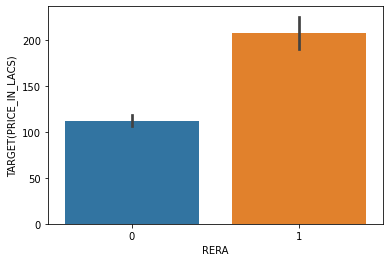

In [23]:
sns.barplot(data=train_data, x='RERA', y='TARGET(PRICE_IN_LACS)') 

In [24]:
print(train_data.groupby('RERA').agg({'TARGET(PRICE_IN_LACS)':'mean'}))

      TARGET(PRICE_IN_LACS)
RERA                       
0                112.566951
1                207.974586


In [25]:
print(train_data['RESALE'].value_counts())

1    27377
0     2074
Name: RESALE, dtype: int64


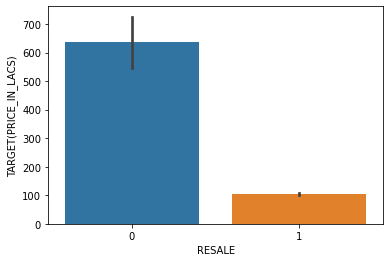

In [26]:
sns.barplot(data=train_data, x='RESALE', y='TARGET(PRICE_IN_LACS)') 

In [27]:
print(train_data.groupby('RESALE').agg({'TARGET(PRICE_IN_LACS)':'mean'}))

        TARGET(PRICE_IN_LACS)
RESALE                       
0                  637.814069
1                  105.405434


In [28]:
train_data['Area_bucket'] = train_data['SQUARE_FT'].apply(lambda age: int(age / 100))

print(train_data.groupby('Area_bucket').agg({'TARGET(PRICE_IN_LACS)':'mean'}))

             TARGET(PRICE_IN_LACS)
Area_bucket                       
0                        25.318519
1                        47.046154
2                        33.127273
3                        34.319708
4                        45.661769
...                            ...
8750                     35.000000
43000                    43.000000
806451                25000.000000
1875000               30000.000000
2545454               28000.000000

[239 rows x 1 columns]


In [29]:
print(train_data['Area_bucket'].value_counts())

10        2929
11        2679
12        2625
9         2322
6         1957
          ... 
427          1
2298         1
806451       1
86           1
1383         1
Name: Area_bucket, Length: 239, dtype: int64


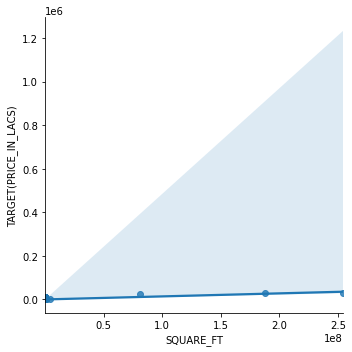

In [30]:
sns.lmplot(data=train_data, x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)') 

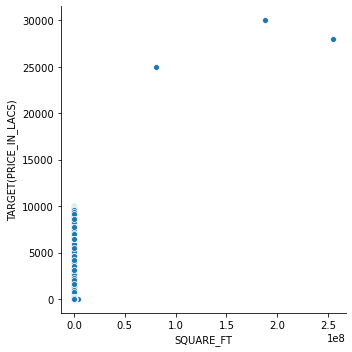

In [31]:
sns.relplot(data=train_data, x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)') 

In [32]:
 train_data.shape

(29451, 10)

In [33]:
# for i in range(29451):
#     if train_data['TARGET(PRICE_IN_LACS)'][i] > 15000:
#         print("i = " + str(i))
#         print(train_data['TARGET(PRICE_IN_LACS)'][i])

In [34]:
# # drop these outliers
# train_data = train_data.drop([10745])
# train_data.shape

In [35]:
# train_data = train_data.drop([11238])
# train_data = train_data.drop([15724])
# train_data.shape

In [36]:
# sns.relplot(data=train_data, x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)') 

In [6]:
for i in range(29451):
    if train_data['SQUARE_FT'][i] > 300000:
        print("i = " + str(i))
        print(train_data['SQUARE_FT'][i])
        train_data = train_data.drop([i])

i = 373
433333.3333
i = 10745
254545454.5
i = 11238
187500000.0
i = 15598
792857.1429
i = 15724
80645161.29
i = 22155
340000.0
i = 25241
4300000.0
i = 28591
875000.0


In [7]:
train_data.shape

(29443, 9)

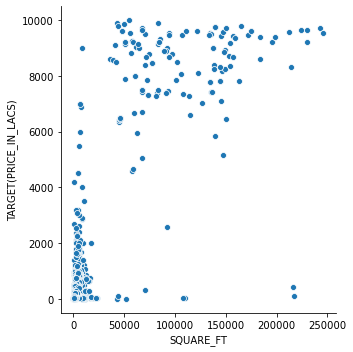

In [39]:
sns.relplot(data=train_data, x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)') 

In [9]:
X = train_data[['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE']]
y = train_data[['TARGET(PRICE_IN_LACS)']]
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE
0,Owner,0,0,2,BHK,1300.236407,1,1
1,Dealer,0,0,2,BHK,1275.000000,1,1
2,Owner,0,0,2,BHK,933.159722,1,1
3,Owner,0,1,2,BHK,929.921143,1,1
4,Dealer,1,0,2,BHK,999.009247,0,1


In [10]:
train_data.shape

(29443, 9)

In [11]:
# Using pd.get_dummies() to encode variables
ohe_BHK_OR_RK = pd.get_dummies(train_data['BHK_OR_RK'])
X = X.merge(ohe_BHK_OR_RK, left_index=True, right_index=True)
X = X.drop(['BHK_OR_RK'], axis=1)

ohe_POSTED_BY = pd.get_dummies(train_data['POSTED_BY'])
X = X.merge(ohe_POSTED_BY, left_index=True, right_index=True)
X = X.drop(['POSTED_BY'], axis=1)

In [13]:
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,BHK,RK,Builder,Dealer,Owner
0,0,0,2,1300.236407,1,1,1,0,0,0,1
1,0,0,2,1275.000000,1,1,1,0,0,1,0
2,0,0,2,933.159722,1,1,1,0,0,0,1
3,0,1,2,929.921143,1,1,1,0,0,0,1
4,1,0,2,999.009247,0,1,1,0,0,1,0


In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X['SQUARE_FT'] = sc.fit_transform(X[['SQUARE_FT']])
X.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,BHK,RK,Builder,Dealer,Owner
0,0,0,2,-0.065022,1,1,1,0,0,0,1
1,0,0,2,-0.068143,1,1,1,0,0,1,0
2,0,0,2,-0.110422,1,1,1,0,0,0,1
3,0,1,2,-0.110822,1,1,1,0,0,0,1
4,1,0,2,-0.102278,0,1,1,0,0,1,0


In [16]:
y

,TARGET(PRICE_IN_LACS)
0,55.0
1,51.0
2,43.0
3,62.5
4,60.5
...,...
29446,45.0
29447,16.0
29448,27.1
29449,67.0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_train = np.ravel(y_train)      
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8992559312129621

In [48]:
y_pred = rf.predict(X_test)
print(y_pred)
y_pred.shape

[305.8         41.912      189.7        ... 191.436      112.163
  30.03545454]


(9717,)

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) 
lr.score(X_test, y_test)

0.7532827883677469

In [33]:
y_pred = lr.predict(X_test)
print(y_pred)
y_pred.shape

[[243.6875]
 [ 70.1875]
 [265.3125]
 ...
 [127.0625]
 [177.3125]
 [ 17.5   ]]


(9717, 1)

In [20]:
from sklearn.tree import DecisionTreeRegressor

dc = DecisionTreeRegressor()
dc.fit(X_train, y_train)
dc.score(X_test, y_test)

0.8746622076735466

In [27]:
y_pred = dc.predict(X_test)
print(y_pred)
y_pred.shape

[370.          34.6        150.         ...  23.4         95.
  29.49473684]


(9717,)

In [50]:
from sklearn.ensemble import AdaBoostRegressor

Adc = AdaBoostRegressor(DecisionTreeRegressor())
Adc.fit(X_train, y_train)
Adc.score(X_test, y_test)


0.888403280171555

In [ ]:
# AdaBoost
# passing parameters
# create a validation set: a subset of my training data

In [ ]:
# validation
# KFold: create multiple accuracies 
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
# Lasso, 
# Ridge: depend on multiple features

In [29]:
from sklearn.linear_model import Ridge


rg = Ridge()
rg.fit(X_train, y_train)
rg.score(X_test, y_test)

0.7532693941961753

In [30]:
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(X_train, y_train)
ls.score(X_test, y_test)

0.7537849088284514

In [31]:
from sklearn.neural_network import MLPRegressor

ml = MLPRegressor()
ml.fit(X_train, y_train)
ml.score(X_test, y_test)

/Users/caijicang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/caijicang/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8343508212292671

In [52]:
X_test.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,BHK,RK,Builder,Dealer,Owner
7304,1,1,4,0.122845,0,1,1,0,0,1,0
2993,0,0,3,-0.072987,1,1,1,0,0,0,1
23340,0,0,4,0.164655,1,1,1,0,0,1,0
28469,0,0,2,-0.102155,1,1,1,0,0,0,1
16596,0,1,1,-0.138508,1,1,1,0,0,1,0


In [53]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [54]:
test_data = test_data.drop(['ADDRESS', 'LONGITUDE', 'LATITUDE'], axis=1)

# One hot encode
ohe_BHK_OR_RK = pd.get_dummies(test_data['BHK_OR_RK'])
test_data = test_data.merge(ohe_BHK_OR_RK, left_index=True, right_index=True)
test_data = test_data.drop(['BHK_OR_RK'], axis=1)

ohe_POSTED_BY = pd.get_dummies(test_data['POSTED_BY'])
test_data = test_data.merge(ohe_POSTED_BY, left_index=True, right_index=True)
test_data = test_data.drop(['POSTED_BY'], axis=1)
test_data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,BHK,RK,Builder,Dealer,Owner
0,0,0,1,545.171340,1,1,1,0,0,0,1
1,1,1,2,800.000000,0,0,1,0,0,1,0
2,0,0,2,1257.096513,1,1,1,0,0,1,0
3,0,0,3,1400.329489,1,1,1,0,0,1,0
4,0,0,1,430.477830,1,1,1,0,0,0,1


In [56]:
sc = StandardScaler()
test_data['SQUARE_FT'] = sc.fit_transform(test_data[['SQUARE_FT']])
test_data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,BHK,RK,Builder,Dealer,Owner
0,0,0,1,-0.013512,1,1,1,0,0,0,1
1,1,1,2,-0.011959,0,0,1,0,0,1,0
2,0,0,2,-0.009173,1,1,1,0,0,1,0
3,0,0,3,-0.008300,1,1,1,0,0,1,0
4,0,0,1,-0.014211,1,1,1,0,0,0,1


In [59]:
preds = rf.predict(test_data)
preds

array([101.402, 166.717, 154.254, ..., 329.074, 163.48 , 102.98 ])

In [60]:
submission = pd.DataFrame()
submission["TARGET(PRICE_IN_LACS)"] = Preds
submission.to_csv('Indian_house_price_prediction.csv', index = False)
submission

,TARGET(PRICE_IN_LACS)
0,101.402
1,166.717
2,154.254
3,152.030
4,105.699
...,...
68715,164.436
68716,229.200
68717,329.074
68718,163.480
